# MinPrj : face recognization
>date : 14 oct 2021<br>
author : bae hueng myounng<br>
email : naroo135@gmail.com<br>
github url : 

- __prj goals__ :<br>
   1) getting img similar to my face <br>
   2) embedding distance < 0.5 <br>
   3) funny application -> important application

## Overview

몇차례 코로나 펜데믹 이후 원거리에서 사람의 온도를 측정하는 도구를 하나 발명해내었다. 이 도구는 사람의 얼굴을 연두색 박스로 인지하고 그 위에 적외선 온도 센서로 측정한 표면 온도를 뛰운다. 그리고 그 사람의 온도에 따라 출입을 통제할 수 있는 근거로 작용한다. 사람의 정확한 온도를 재기 위해선 사실 항문이나 입, 겨드랑이와 같인 민감한 부위에 체온계를 대는 것이 가장 정확하다. 하지만 이러한 절차는 모든 출입에 대해서 번거로우며 적합하지 않다. 따라서 외부로 상당 부분 노출되어 있는 얼굴에 대해 적외선 카메라로 실제 온도와 근접한 온도를 얻는 방법이 현재로썬 가장 적합해 보인다. 현재 많은 운영기관에서 사용되는 얼굴인식과 적외선 카메라의 조합에서 사람의 얼굴을 인지하는 기술이 핵심이다. 이번 프로젝트는 사람의 얼굴을 인식하는 알고리즘과 이미지들간의 유사성을 확인해보는 목적을 수행할 것이다.

## Design Processing

### 1) get img files

file_list: ['firstteam_stevenbergwijn_2021_22.png', 'lee.jpg', 'benjapic.jpg', 'namju.jpg', 'firstteam_bryangil_2021_22.png', 'firstteam_jackclarke.png', 'firstteam_harrywinks_2021_22.png', 'firstteam_sergioreguilon_2021_22.png', 'firstteam_tanguyndombele_2021_22.png', 'firstteam_delealli_2021_22.png', 'leechunmon.jpg', 'firstteam_pierluigigollini_2021_22.png', 'leeji.jpg', 'firstteam_hugolloris_2021_22.png', 'kang.jpg', 'firstteam_emersonroyal.png', 'firstteam_bendavies_2021_22.png', 'firstteam_oliverskipp_2021_22.png', 'firstteam_giovanilocelso_2021_22.png', 'firstteam_cristianromero_2021_22.png', 'firstteam_japhettanganga_2021_22.png', 'firstteam_ericdier_2021_22.png', 'leejung.jpg', 'firstteam_joerodon_2021_22.png', 'firstteam_pierreemilehojbjerg_2021_22.png', 'matt-doherty.png', 'ko.jpg', 'firstteam_ryansessegnon_2021_22.png', 'leesung.jpg', 'firstteam_heungminson_2021_22.png', 'firstteam_lucasmoura_2021_22.png', 'firstteam_harrykane_2021_22.png', 'leechun.jpg', 'firstteam_davinso

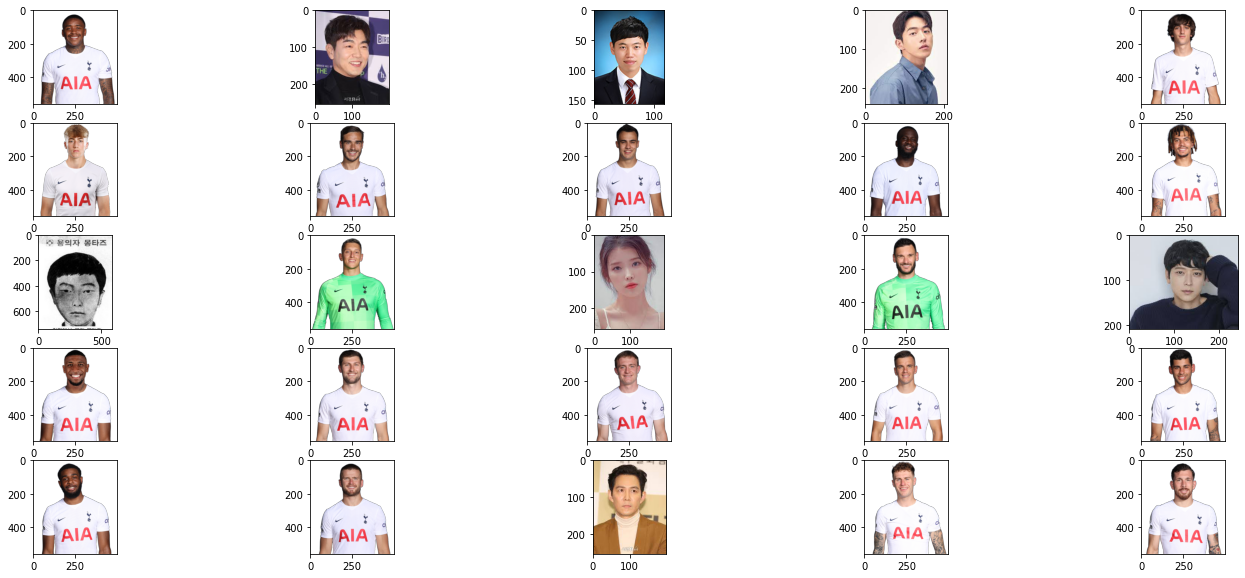

In [44]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/ExpImg'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))
print(file_list)
import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(24,10))

# flatten axes for easy iterating
# Ig*(enumerate) : return value are order and vlaue
for i, ax in enumerate(axes.flatten()):         
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### 2) Crop recognized face

In [45]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    print("face location: {}".format(face_locations))  # 이미지에서 얼굴 영역의 좌표를 출력합니다.
    print(image.shape)

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    return cropped_face
    


face location: [(92, 306, 199, 199)]
(559, 500, 3)


numpy.ndarray

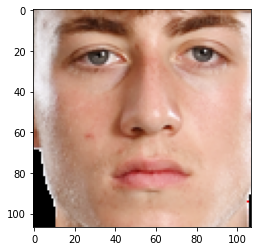

In [46]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/ExpImg/firstteam_jackclarke.png'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

type(cropped_face)

토트넘 선수 중 jackclarke라는 선수의 이미지를 불러와 얼굴 부위를 잘라 보있다

### 3) Embedding of cropped imgs

In [47]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(cropped_face)  

In [48]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [49]:
embedding_dict = get_face_embedding_dict(dir_path)
print(embedding_dict.keys())
print(embedding_dict['benjapic'])
print(embedding_dict['benjapic'].shape)

face location: [(67, 311, 196, 182)]
(559, 500, 3)
face location: [(56, 163, 163, 55)]
(253, 199, 3)
face location: [(49, 83, 101, 31)]
(157, 118, 3)
face location: [(26, 185, 116, 96)]
(240, 210, 3)
face location: [(67, 311, 196, 182)]
(559, 500, 3)
face location: [(92, 306, 199, 199)]
(559, 500, 3)
face location: [(96, 325, 225, 196)]
(559, 500, 3)
face location: [(82, 311, 211, 182)]
(559, 500, 3)
face location: [(68, 318, 175, 211)]
(559, 500, 3)
face location: [(80, 294, 187, 187)]
(559, 500, 3)
face location: [(333, 504, 718, 118)]
(742, 582, 3)
face location: [(80, 306, 187, 199)]
(559, 500, 3)
face location: [(56, 151, 163, 44)]
(259, 194, 3)
face location: [(96, 311, 225, 182)]
(559, 500, 3)
face location: [(63, 162, 138, 88)]
(208, 242, 3)
face location: [(64, 322, 219, 167)]
(559, 500, 3)
face location: [(67, 311, 196, 182)]
(559, 500, 3)
face location: [(82, 311, 211, 182)]
(559, 500, 3)
face location: [(82, 311, 211, 182)]
(559, 500, 3)
face location: [(92, 294, 199, 187)]

  <div class="alert alert-block alert-info">
<b>Result:</b> 나의 이미지를 엠비딩 했을 때의 결과는 128차원의 임베딩 밸류들을 확인할 수 있다
</div>

### 4) measurement of face distance

유사성을 확인하기 위해선 머신 러닝에서는 각 임베딩 값들의 유클리디안 거리를 구한 결과값에 의존한다. 이 프로젝트에서도 얼굴들의 유사성을 측정하기 위해 각 차원간의 값에 대해서 root mean square의 과정을 거치며 아래 파이썬 코드에서 `np.linalg.norm(~, ord=2)` 로 구현하였다.
    


In [50]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('benjapic', 'firstteam_heungminson_2021_22')

0.5857809229359688

  <div class="alert alert-block alert-info">
<b>Result:</b> 나의 이미지와 손흥민 선수간의 엠베딩 거리를 측정해 본 결과 0.58로써 확인된다. 임베딩 거리가 0.58이라는 수치는 다른 선수들간의 거리를 아직 파악하지 못하므로 어느정도 닮은 수치인지 파악하기 어렵다. 
</div>

In [51]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('benjapic')   
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('benjapic',
  array([-0.16165729,  0.04053181,  0.11067155, -0.06393073, -0.1672025 ,
         -0.07861891, -0.0347613 , -0.13476156,  0.0916216 , -0.10646342,
          0.28021359, -0.07509418, -0.20169879, -0.09446677, -0.03307995,
          0.17242765, -0.15105511, -0.10316772, -0.0032479 ,  0.03150427,
          0.12665728, -0.03211994,  0.05770222, -0.0012467 , -0.15774037,
         -0.3663989 , -0.14432445, -0.0430022 , -0.00867736, -0.01459816,
         -0.05016694,  0.04878235, -0.18063152, -0.04776987,  0.01838811,
          0.06644998,  0.00727546, -0.06998013,  0.11568721, -0.0159115 ,
         -0.24850377,  0.03786165,  0.03311892,  0.22518371,  0.16633324,
          0.03093808,  0.0751709 , -0.11822471,  0.1035548 , -0.17124499,
          0.01417502,  0.10907069,  0.08981553, -0.00365417, -0.0106243 ,
         -0.1108653 ,  0.04643073,  0.10095249, -0.1578801 ,  0.02486784,
          0.11233607, -0.05102399, -0.03111526, -0.09277972,  0.1999785 ,
          0.08749642, -0

### 5) Show img nearest my img

In [52]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
get_nearest_face('benjapic')

순위 1 : 이름(ko), 거리(0.5059048144864847)
순위 2 : 이름(leejung), 거리(0.5279220235439532)
순위 3 : 이름(namju), 거리(0.5513297801980619)
순위 4 : 이름(lee), 거리(0.5519532442901419)
순위 5 : 이름(firstteam_heungminson_2021_22), 거리(0.5857809229359688)
순위 6 : 이름(leesung), 거리(0.6046314114133298)
순위 7 : 이름(leechun), 거리(0.6080165891463714)
순위 8 : 이름(kang), 거리(0.630125011974494)
순위 9 : 이름(leeji), 거리(0.6462285819200959)
순위 10 : 이름(leechunmon), 거리(0.6690011009771566)


  <div class="alert alert-block alert-info">
<b>Result:</b> 내가 모은 이미지 들을 종합해 본 결과 나와 비슷한 순위는 고종수(축구선수), 이정재(오징어게임주연), 남주혁, 이종혁, 손흥민, 이성경,이춘재(흉악범죄자),강동원,이지은(아이유),이춘재(몽타주버전)으로 나타났다. 이 결과에서 주목할 것은 나의 얼굴 특징들은 유럽 선수의 얼굴특징들보다 한국인의 여성 특징이 더 유사하다는 결과를 나타난다. 나는 남성성이 다소 강해보이고 전형적인 남성적 특징들이 얼굴에서 확인할 수 있는데 기계는 남성성, 여성성보다 인종의 특징들에 중점을 두는 듯 하다.
</div>

### 6) application of face recognization

나는 이러한 얼굴 인식 기술을 토대로 하나 응용하고 싶은 분야를 생각해내었다. 각종 범죄, 스릴러의 장르를 좋아하는 나의 관심사에서 사회의 손실을 일으킬 잠재적 위협으로부터 안정성을 확보할 수 있는 기술에서 사람의 얼굴 인식은 매우 유용할 것이라는 생각을 하게 되었다. 그 중 이춘재의 기사를 보게 되었다. 이춘재는 세간을 떠들썩하게 했던 화성연쇄살인범이다. 한국에서 오랫동안 미제사건으로 남아 있었고 이춘재의 자백으로 인해 진위를 확인하였고 최종적으로 연쇄살인범임을 입증하게 되었다. 하지만 공소시효가 지나 공소권이 없는 상태이다. 

이미 발생한 사건에 대해서 용의자들을 빠르게 찾는 것이 앞으로의 피해자를 줄이는 최선의 방책이다. 그리고 목격자의 몽타주 혹은 흐릿하게나마 찍힌 용의자의 이미지를 토대로 인공지능의 기술로 용의자들의 리스트를 만들어 점차 수사망을 좁힌다면 사건이 확대되는 것을 막을 확률이 높아진다. 나는 이춘재의 몽타주와 실물사진을 구해서 이를 실험해 보기로 하였다.

ref : https://m.hankookilbo.com/News/Read/201909251184090201

In [55]:
get_nearest_face('leechunmon')

순위 1 : 이름(leejung), 거리(0.4781417447587468)
순위 2 : 이름(namju), 거리(0.48285233048468656)
순위 3 : 이름(kang), 거리(0.5163357739112426)
순위 4 : 이름(firstteam_heungminson_2021_22), 거리(0.5200232379638846)
순위 5 : 이름(lee), 거리(0.5376932644370279)
순위 6 : 이름(leechun), 거리(0.5472797545106943)
순위 7 : 이름(ko), 거리(0.5823091481506716)
순위 8 : 이름(leeji), 거리(0.6174978932243153)
순위 9 : 이름(leesung), 거리(0.6545006288542713)
순위 10 : 이름(benjapic), 거리(0.6690011009771566)


face location: [(333, 504, 718, 118)]
(742, 582, 3)


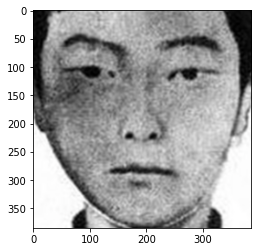

In [68]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/ExpImg'
cropped_face_leechunmon = get_cropped_face(image_path + '/' + 'leechunmon.jpg')
plt.imshow(cropped_face_leechunmon)

face location: [(56, 135, 146, 46)]
(254, 198, 3)


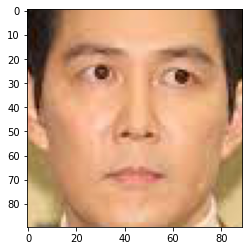

In [69]:
cropped_face_leejungjae = get_cropped_face(image_path + '/' + 'leejung.jpg')
plt.imshow(cropped_face_leejungjae)

face location: [(167, 365, 390, 142)]
(694, 556, 3)


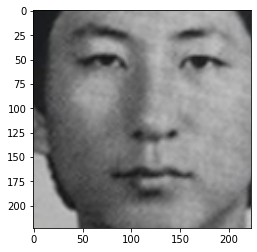

In [71]:
cropped_face_leechun = get_cropped_face(image_path + '/' + 'leechun.jpg')
plt.imshow(cropped_face_leechun)

  <div class="alert alert-block alert-info">
<b>Result:</b> 이춘재 몽타주와 비슷한 사람은 다음과 같다. 이정재, 남주혁, 강동원, 손흥민, 이종혁, "이춘재",고종수, 이지은,이성경,배흥명(나)이다. 이러한 결과는 다소 당혹감을 준다. 이춘재 몽타주로 범죄자를 찾고 싶은데 정작 가장 비슷한 사람은 오징어 게임의 이정재, 배우 남주혁, 강동원, 손흥민과 같은 셀럽들로 결과가 나왔기 때문이다.
</div>

## Analysis

사람의 닮을과 그렇지 않음을 판단하는 것은 사람마다 상이한 기준이 있다. 그리고 판단의 기준들은 인종, 문화, 국가 등의 카테고리에서 어떠한 패턴이 존재하기도 한다. 예를 들면 미국인이 보았을 때 한국인, 중국인, 일본인을 구분짓는것을 매우 어려워한다. 하지만 우리는 한국인, 중국인, 일본인을 구분지을 때 큰 어려움 없이 정답을 맞출 수 있다. 반대로 우리는 미국인, 영국인, 독일인 들을 구분짓는 것을 어려워한다. 길거리에서 보이는 서양권 외국인들을 보면 금발에 하얀 피부라는 이유로 저 사람은 미국인이라고 단정 짓기도 한다. 
이러한 차이는 세세한 얼굴의 특징에 대해 학습의 차이에서 비롯된다. 서양권의 사람들은 서양권 내 여러 인종, 문화권, 국가의 사람들의 범주로 그들의 공통된 특징들을 학습한다. 따라서 서양 사람들은 서양권 내 사람들의 특징들의 클래스들을 참조하여 이 사람이 어느 나라, 어떤 민족의 소속인지 동양권의 사람보다 더 구체적으로 추측할 수 있다. 따라서 이번 프로젝트에서 살펴본 임베딩기법으로 계산한 이미지들 간의 유사성에 대해서 특징적 요소들을 학습할 필요가 있어 보인다. 


### In my opinion

사람의 얼굴을 인지하는 기술은 이미 중국, 미국에서 사용화되고 있으며 중국이 선진적 기술을 보유하고 있다. 중국에서는 학생들의 학습 태도를 점검하는데 인공지능으로 학생들 얼굴, 몸을 관찰하며 감독하고 있다. 하지만 나는 기술이 인간을 통제하는 것에 대해서 부정적인 입장이다. 만약 인공지능이 사람의 얼굴을 모두 학습하여 통제하려 한다면 특정 세력에 반하는 주장을 펼치는 사람에 대해 타겟팅이 쉬워지며 감시망에서 자유롭지 못하기 때문이다. 또한 사회에서 은밀하게 이루어지는 청부살인에서 이와 같은 기술이 악용된다면 특정 이익 집단 혹은 개인의 권력은 이전보다 은밀하고 강력해질 것이다.

나는 이번 프로젝트 뿐만 아니라 인공지능 기술에 대해서 사람에게 이로운 기술을 기대하고 개발하고 싶은 욕구가 있다. 이제까지 기술들은 사람의 편의성을 높여주고 삶의 질을 높여주었다고 하지만 몇몇 기술들은 오히려 사람의 능력을 퇴화시키고 악용되기도 한다. 인터넷 활용은 겉으로 보기엔 정보의 접근성, 확장성을 높여주는 위대한 기술로 칭송받아왔지만 몇몇 인지심리학자들의 연구에는 오히려 사람의 정보처리능력을 퇴화시키고 산만해지는 환경을 제공한다고 입증하고 있다. 